En este Archivo vamos a tomar 3 modelos 'X, Y, Z' y vamos a graficar una predicción y observaremos que tan próximos son sus predicciones... :-)


In [51]:

import tensorflow as tf 
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd 

import sys
sys.path.append('../')
from Utils import plotter
%matplotlib widget

In [52]:
x_test = pd.read_excel("../Train_Test/Dataset_Separado/x_test.xlsx")
y_test = pd.read_excel("../Train_Test/Dataset_Separado/y_test.xlsx")

In [53]:
# Obtenemos los modelos que vamos a utilizar para el test
# En este caso serán 3 modelos distintos, ya que el entrenamiento 
# se lo realizo de manera individual.
model_X = tf.keras.models.load_model('../modelos_entrenamiento/modelos_x/mod_x_400_90.keras')
model_Y = tf.keras.models.load_model('../modelos_entrenamiento/modelos_y/mod_y_440_80_vs10_Adam_loss_32.keras')
model_Z = tf.keras.models.load_model('../modelos_entrenamiento/modelos_z/mod_z_1000_70_vs10_adamW_loss_57.keras')

In [54]:
# idx es el numero de fila que se tomará para realizar la predicción,
# esto en el conjunto de Test. 

idx = 0
 
pred_x = model_X.predict(np.expand_dims(x_test.iloc[idx], axis=0))
pred_y = model_Y.predict(np.expand_dims(x_test.iloc[idx], axis=0))
pred_z = model_Z.predict(np.expand_dims(x_test.iloc[idx], axis=0))

pred_x = pred_x.flatten()
pred_y = pred_y.flatten()
pred_z = pred_z.flatten()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


In [55]:
# Localizo el idx en y_test lo separo en 3 arrays, transf de Serie a Array numpy
true_coord = y_test.iloc[idx]
true_x = true_coord[0:100].to_numpy()
true_y = true_coord[100:200].to_numpy()
true_z = true_coord[200:300].to_numpy()


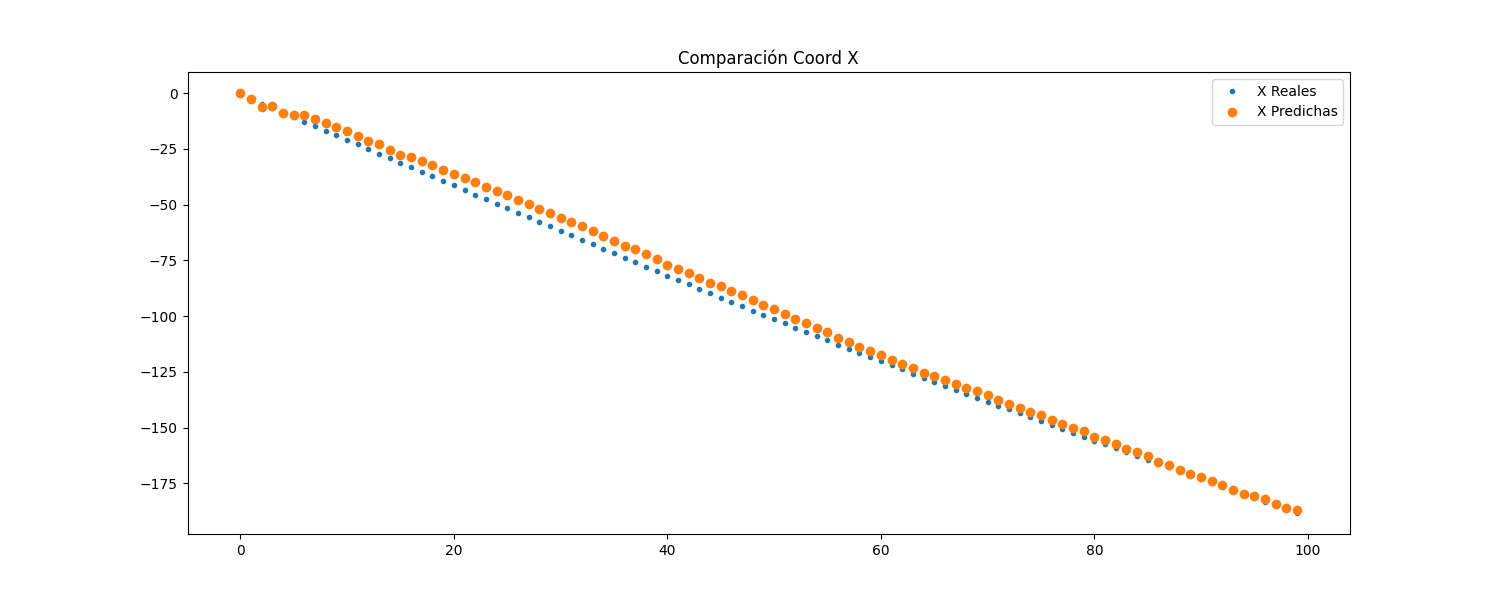

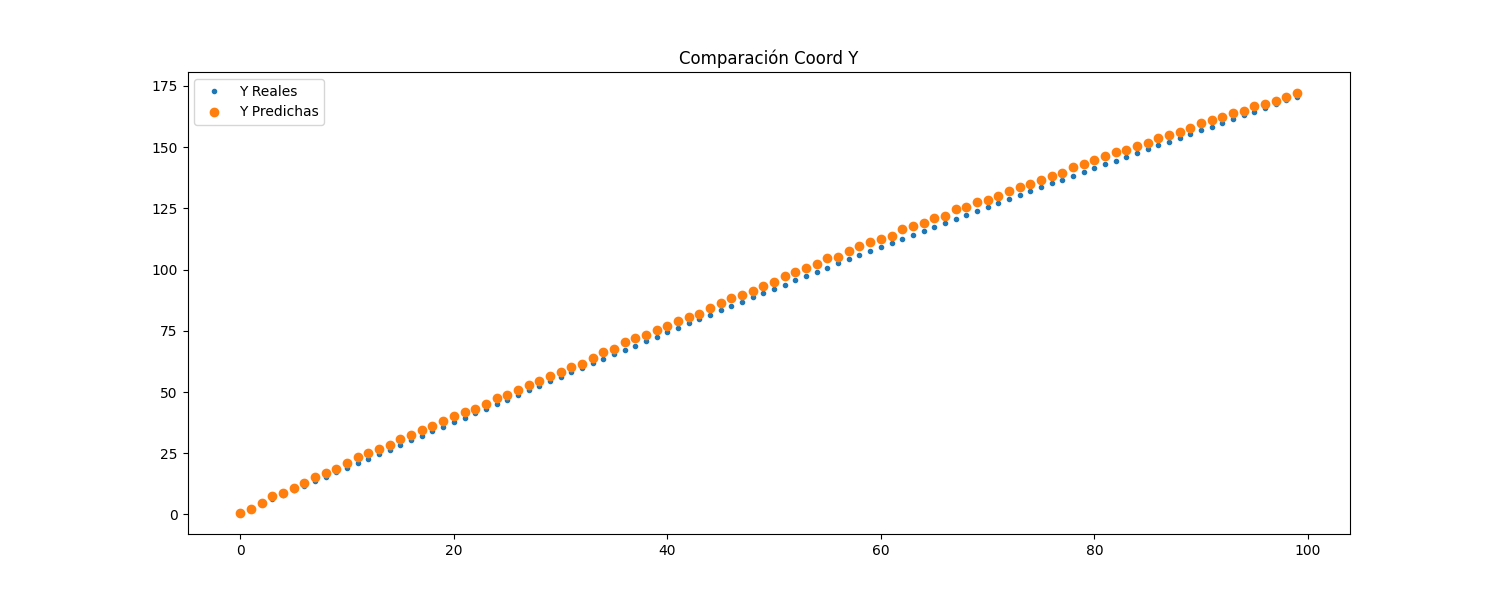

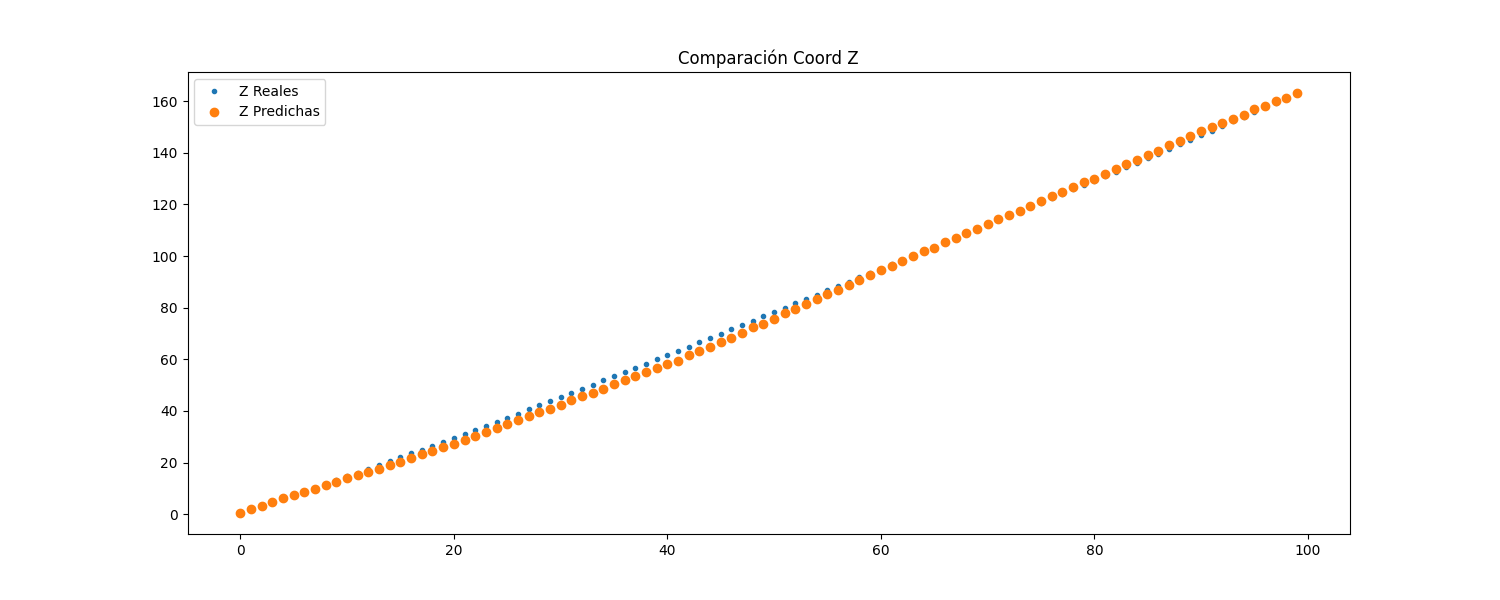

In [56]:

import matplotlib.pyplot as plt
# Gráfica X
plotter.plot_1D(true_x,pred_x,'X')
# Gráfica Y
plotter.plot_1D(true_y,pred_y,'Y')
# Gráfica Z
plotter.plot_1D(true_z,pred_z,'Z')


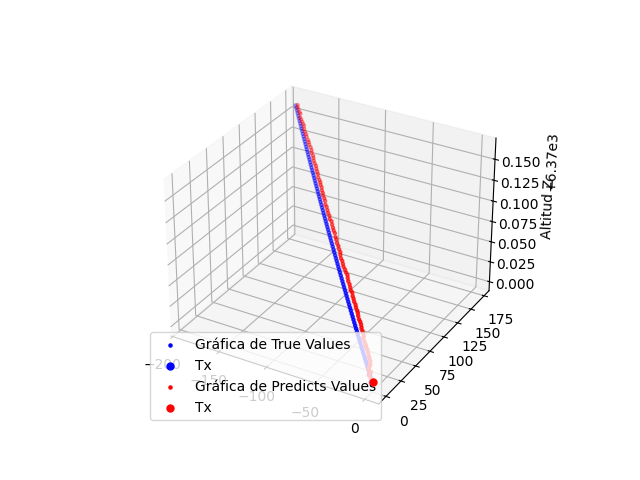

In [57]:

# plotter.plot_3D(true_x,true_y,true_z,"blue",".")

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax = plotter.plot_3D(true_x,true_y,true_z, ax = ax,color = 'blue',label = "True Values",marker = ".")
ax = plotter.plot_3D(pred_x,pred_y,pred_z,ax=ax, color='red',label='Predicts Values',marker='.')
plt.show()


In [58]:
from Utils import geo_conversions as gc

# Transformaremos las coordenadas cartesianas a Esfericas  
# Hasta aquí tenemos una muestra predicha de 300 pts.

phi,theta,rho = gc.transform_cartesian_to_spherical(true_x,true_y,true_z)
phi_pred,theta_pred,rho_pred= gc.transform_cartesian_to_spherical(pred_x,pred_y,pred_z)

latitude_true,longitude_true,height_true = gc.transform_spherical_to_geographic(phi,theta,rho)
latitude_pred,longitude_pred,height_pred = gc.transform_spherical_to_geographic(phi_pred,theta_pred,rho_pred)
# Acá lo que busco es posicionarme en un index de los 100 del array y ver
# su transformación en coordenadas esfericas y luego geograficas.

index = 97
print(f'Valores que ingresan en true x={true_x[97]} y={true_y[97]} z={true_z[97]}')
print(f'Valores que ingresan en pred x ={pred_x[97]} y={pred_y[97]}, z={pred_z[97]}')

print(f'Esfericas true phi:{phi[index]},theta:{theta[index]},rho:{rho[index]}')
print(f'Esfericas pred phi:{phi_pred[index]},theta:{theta_pred[index]},rho:{rho_pred[index]}')

print(f'Geograficas true: Latitud{latitude_true[index]}, Longitud:{longitude_true[index]}, Altura:{height_true[index]}')
print(f'Geograficas pred: Latitud{latitude_pred[index]}, Longitud:{longitude_pred[index]}, Altura:{height_pred[index]}')
# Nota: ver la altura ese 1 demas provoca en el calculo de longitud mucha variación

print('z',true_z[50])

Valores que ingresan en true x=-184.8183254032843 y=167.5922654324669 z=159.4517671700582
Valores que ingresan en pred x =-184.09400939941406 y=168.9364013671875, z=160.01199340820312
Esfericas true phi:-0.7365563846889417,theta:-1.002113150810101,rho:296.0909436158343
Esfericas pred phi:-0.7424888014793396,theta:-1.0011950731277466,rho:296.7051696777344
Geograficas true: Latitud-42.201572216090646, Longitud:-57.41685413597577, Altura:295.0909436158343
Geograficas pred: Latitud-42.541473388671875, Longitud:-57.36425018310547, Altura:295.7051696777344
z 78.29311861619797


In [59]:
from Utils import utils_nn
from sklearn.metrics import mean_squared_error

#calculamos el error cuadratico medio en x 

ecmU,recmU = utils_nn.calculate_ECM_RECM(true_x,pred_x)
ecm = mean_squared_error(true_x,pred_x)

print(ecmU,ecm)

13.906344244536665 13.906344244536665


In [60]:
latitude,longitude,height = gc.transform_spherical_to_geographic(phi,theta,rho)
latitude_pred,longitude_pred, height_pred = gc.transform_spherical_to_geographic(phi_pred,theta_pred,rho_pred) 

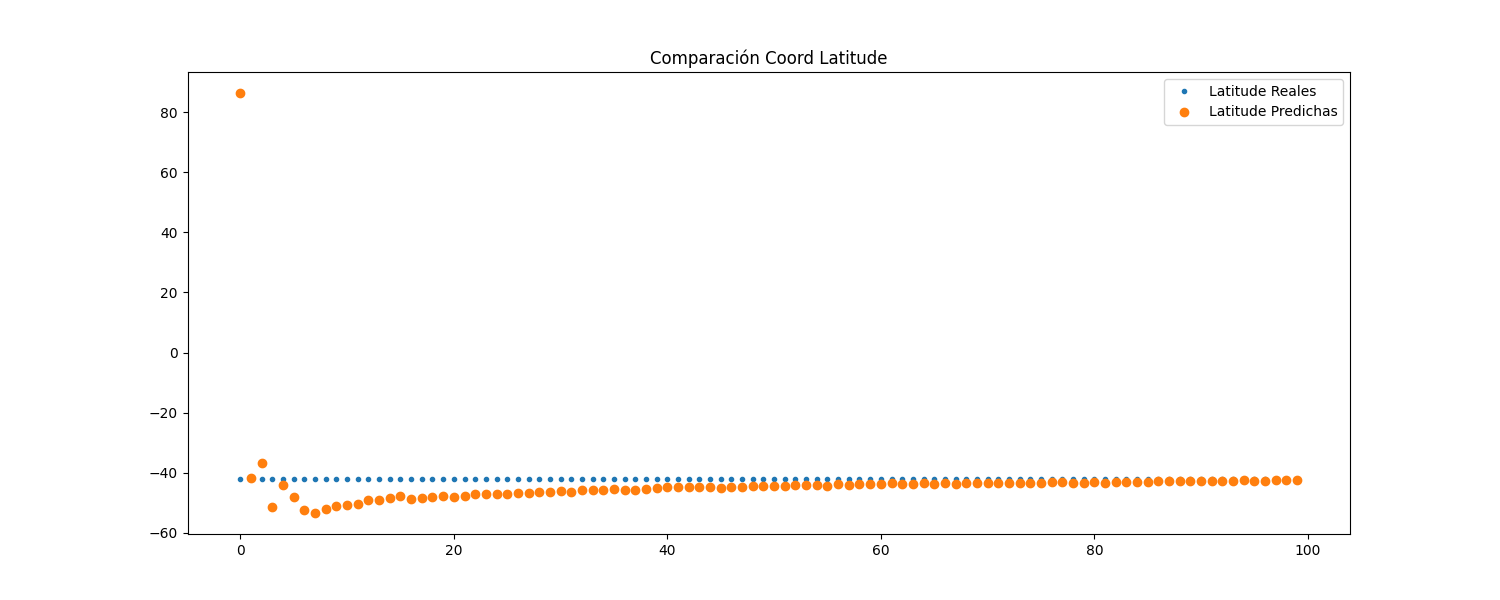

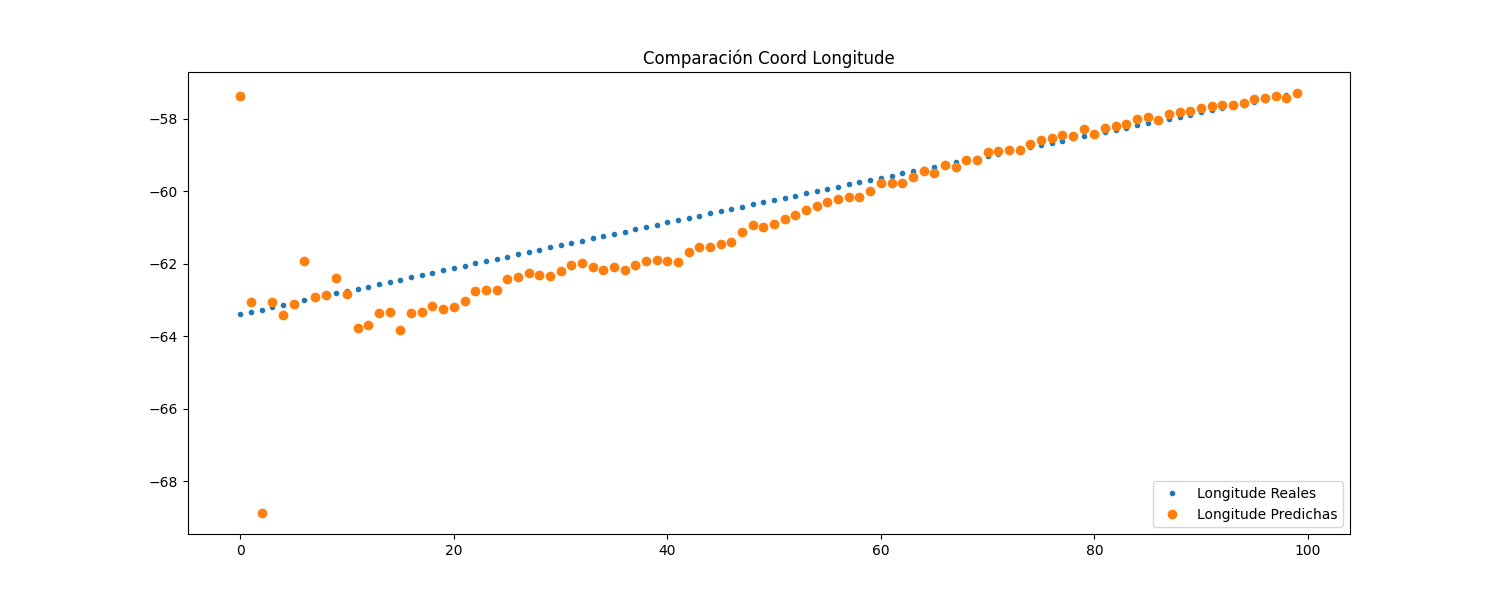

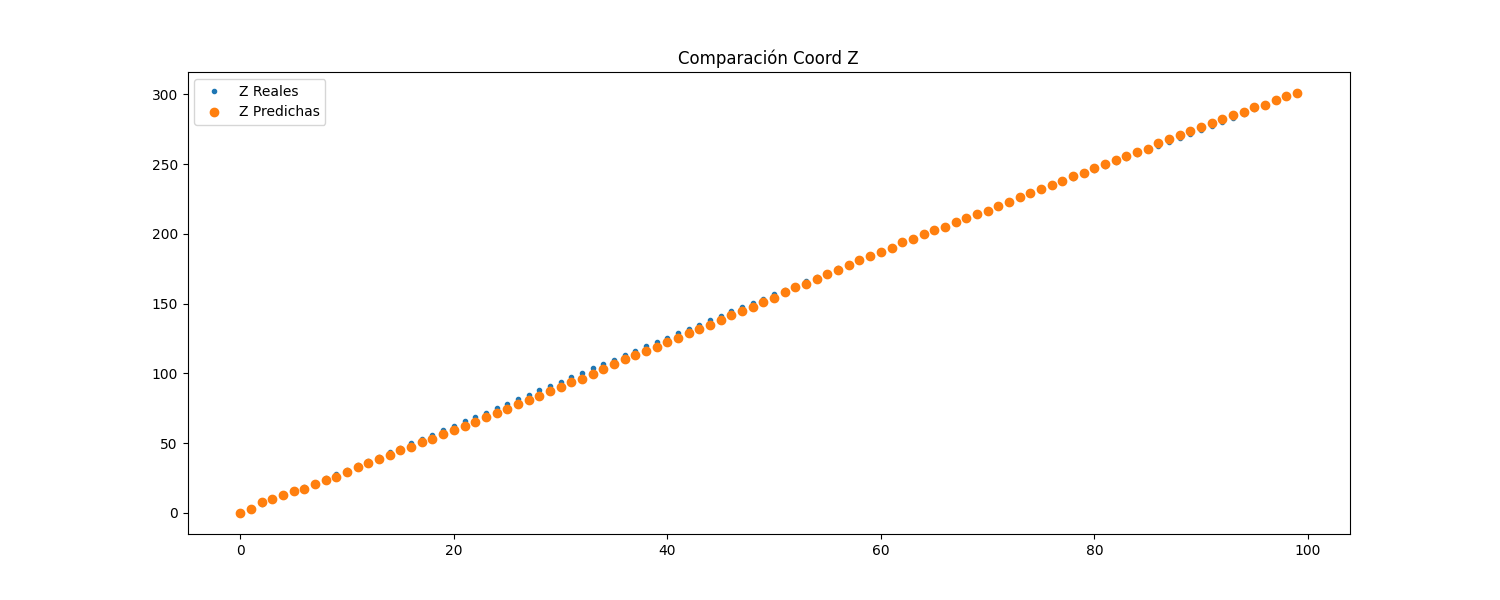

In [61]:
# Gráficas
# Gráfica X
plotter.plot_1D(latitude,latitude_pred,'Latitude')
# Gráfica Y
plotter.plot_1D(longitude,longitude_pred,'Longitude')
# Gráfica Z
plotter.plot_1D(height,height_pred,'Z')

In [62]:
import sys
import os 
# Obtenemos Ruta absoluta del directorio principal
ruta_principal = os.path.abspath(os.path.join(os.getcwd(),'..'))
# Agregamos ruta principal a sys.path
print(os.getcwd())
if ruta_principal not in sys.path:
  print("ingresa")
  sys.path.append(ruta_principal)
  
print(ruta_principal)
print(os.getcwd())

f:\Ray_Tracing-main\Graficas 1D y 3D
f:\Ray_Tracing-main
f:\Ray_Tracing-main\Graficas 1D y 3D


In [63]:
height[0]

np.float64(0.0)

In [64]:
from pruebas import transformar_a_radians,graficar_curvas

156.75719105113637


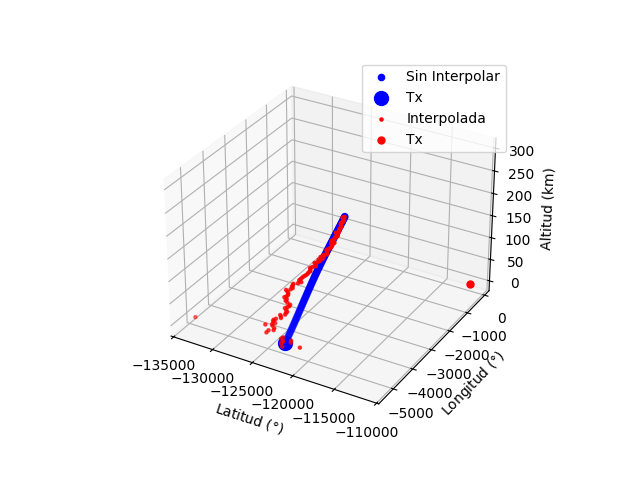

In [65]:
phi_true,theta_true,radio_true = transformar_a_radians(latitude,longitude,height)
print(height[50])
phi_pred,theta_pred,radio_pred =transformar_a_radians(latitude_pred,longitude_pred, height_pred)
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax = graficar_curvas(phi_true,theta_true,radio_true, ax=ax, color = "blue", label = "Sin Interpolar",marker = "o")
ax = graficar_curvas(phi_pred,theta_pred,radio_pred, ax=ax , color = "red", label = "Interpolada", marker = "." )
plt.show()


In [66]:
radio_pred

array([6370810.5, 6374031. , 6378419. , 6380573. , 6383760.5, 6386310.5,
       6388192.5, 6391654. , 6394375. , 6396989. , 6400395.5, 6403999.5,
       6406910. , 6409347. , 6412669. , 6416096.5, 6418422. , 6421557. ,
       6424170.5, 6427577. , 6430664. , 6433446.5, 6436090. , 6439478.5,
       6442615. , 6445321.5, 6448850.5, 6451730. , 6454986.5, 6458126. ,
       6461070. , 6464487.5, 6467085.5, 6470724. , 6474259. , 6477357. ,
       6481008.5, 6483826.5, 6486739.5, 6490181. , 6493271. , 6496497. ,
       6499608. , 6502719. , 6505971. , 6509268. , 6512587. , 6515677. ,
       6518849.5, 6522367. , 6525249. , 6529375.5, 6532580. , 6535386.5,
       6538899. , 6542507. , 6545117.5, 6548552.5, 6552164. , 6555355. ,
       6558247. , 6560987.5, 6564974. , 6567687. , 6570712.5, 6573459.5,
       6576177. , 6579823. , 6582364.5, 6585220.5, 6587586.5, 6591155.5,
       6594170.5, 6597387.5, 6600061. , 6602945. , 6605946. , 6608975.5,
       6612365. , 6614840. , 6618053.5, 6620928.5, 